# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy as sp
import scipy.stats

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error                        
            
from sklearn.linear_model import LinearRegression

In [ ]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Поочередно изучим данные каждой табдицы, а также проверим их на наличие пропусков.

In [ ]:
print(geo_data_0)
print()
print(geo_data_0.isnull().sum())
print()
print(geo_data_0.info())
print()
print(geo_data_0.describe())

          id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0

<AxesSubplot:>

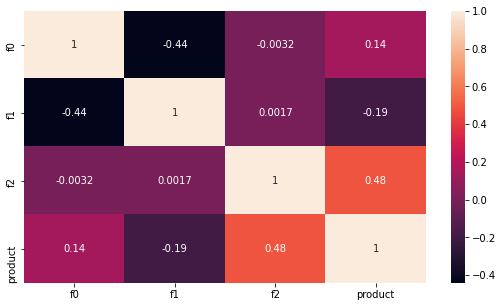

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(geo_data_0.corr(), annot=True)

In [ ]:
print(geo_data_1)
print()
print(geo_data_1.isnull().sum())
print()
print(geo_data_1.info())
print()
print(geo_data_1.describe())

          id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081196 -11.506057  4.999415  137.945408
4      AHL4O  12.702195  -8.147433  5.004363  134.766305
...      ...        ...        ...       ...         ...
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 5 columns]

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 n

<AxesSubplot:>

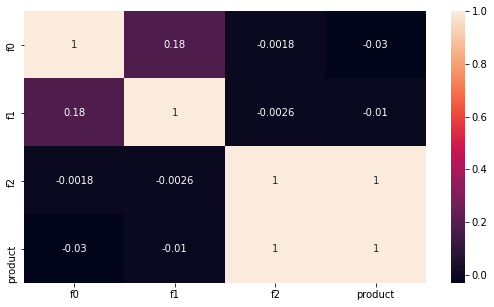

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(geo_data_1.corr(), annot=True)

In [ ]:
print(geo_data_2)
print()
print(geo_data_2.isnull().sum())
print()
print(geo_data_2.info())
print()
print(geo_data_2.describe())

          id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0

<AxesSubplot:>

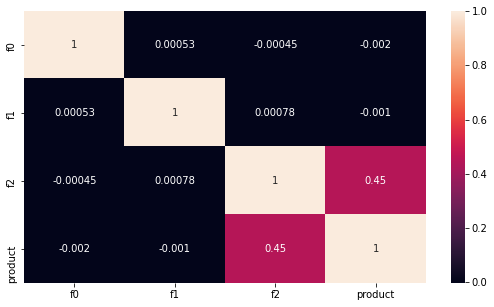

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(geo_data_2.corr(), annot=True)

После прочтения и предварительного просмотра данных таблицы содержат одинаковые названия столбцов и показвают данные по разным регионам. Во всех датасетах одинаковое количество значений. Также во всех таблицах отсутствуют пропуски, ура.
По графикам матриц корреляции отчетливо видна линейная зависимость, значит модель линейной регрессии идеально подойдет для этих данных.

In [ ]:
geo_data_0 = geo_data_0.drop(columns=['id'], axis=0)
geo_data_1 = geo_data_1.drop(columns=['id'], axis=0)
geo_data_2 = geo_data_2.drop(columns=['id'], axis=0)

Удалим столбец с информацией об id скважин, так как при дальнейшей работе с данными и стандартизации она будет мешать, а информация, указанная в ней нам не требуется.

## Обучение и проверка модели

Разделим данные на обучающую и валидационную выборки в соотношении 75:25. Удобнее всего будет сделать это с помощью функции, которая принимает на вход датасет и делит его. Целевой признак это объем запасов (product).

In [ ]:
def split(data): # разбиваем датасет на обучающую и валидационные выборки
    features = data.drop(['product'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=12345)
    return features_train, target_train, features_valid, target_valid

In [ ]:
features_train_0, target_train_0, features_valid_0, target_valid_0 = split(geo_data_0)
features_train_1, target_train_1, features_valid_1, target_valid_1 = split(geo_data_1)
features_train_2, target_train_2, features_valid_2, target_valid_2 = split(geo_data_2)

Проверим все ли данные правильно разделились.

In [ ]:
print(f'Обучающие данные:{features_train_0.shape[0]}\nВалидационные: {features_valid_0.shape[0]}')
print()
print(f'Обучающие данные:{features_train_1.shape[0]}\nВалидационные: {features_valid_1.shape[0]}')
print()
print(f'Обучающие данные:{features_train_2.shape[0]}\nВалидационные: {features_valid_2.shape[0]}')

Обучающие данные:75000
Валидационные: 25000

Обучающие данные:75000
Валидационные: 25000

Обучающие данные:75000
Валидационные: 25000


Теперь можно масштабировать данные методом стандартизации.

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train_0)
features_train_0 = scaler.transform(features_train_0)
features_valid_0 = scaler.transform(features_valid_0)

scaler.fit(features_train_1)
features_train_1 = scaler.transform(features_train_1)
features_valid_1 = scaler.transform(features_valid_1)

scaler.fit(features_train_2)
features_train_2 = scaler.transform(features_train_2)
features_valid_2 = scaler.transform(features_valid_2)

На данном этапе мы поделили полученные датасеты на обучающую и валидационную выборки, масштабировали их методом стандартизации и переходим к работе с моделью. Обучим модель линейной регрессии и сделаем предсказания.

In [ ]:
model = LinearRegression() # модель линейная регрессия

In [ ]:
def fitting(features_train, target_train, features_valid, target_valid): # обучаем модель
    model.fit(features_train, target_train)
    return pd.Series(model.predict(features_valid)), target_valid

In [ ]:
predicted_0, target_0 = fitting(features_train_0, target_train_0, features_valid_0, target_valid_0)
predicted_1, target_1 = fitting(features_train_1, target_train_1, features_valid_1, target_valid_1)
predicted_2, target_2 = fitting(features_train_2, target_train_2, features_valid_2, target_valid_2)

Предсказания и правильные ответы сохранены, теперь выведем средний запас предсказанного сырья и RMSE модели.

In [ ]:
def results(answers, predictions):
    mse = mean_squared_error(answers, predictions)
    print('Средний запас сырья:', predictions.mean())
    print('RMSE:', mse ** 0.5)

In [ ]:
print('Регион 0')
print()
results(target_0, predicted_0)
print('--------------------------------------')
print('Регион 1')
print()
results(target_1, predicted_1)
print('--------------------------------------')
print('Регион 2')
print()
results(target_2, predicted_2)
print('--------------------------------------')

Регион 0

Средний запас сырья: 92.59256778438035
RMSE: 37.5794217150813
--------------------------------------
Регион 1

Средний запас сырья: 68.728546895446
RMSE: 0.893099286775617
--------------------------------------
Регион 2

Средний запас сырья: 94.96504596800489
RMSE: 40.02970873393434
--------------------------------------


Таким образом, мы обучили модель линейной регрессии на полученных данных и сделали предсказания на валидационной выборке. Лучше всего наша модель предсказывает данные в 1 регионе, так как там метрика RMSE показывает наилучший результат. Средний запас сырья больше в регионах 0 и 3, но и показатель ошибки там достаточно высокий.

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [ ]:
BUDGET = 10_000_000_000 # общий бюджет
OIL_WELLS = 200 # лучшие скважины для разработки
PROFIT = 450000 # доход с 1 барреля сырья

ONE_WELL = BUDGET / OIL_WELLS # цена бурения 1 скважины исходя из общего бюджета
print(ONE_WELL / PROFIT) # объем сырья для окупаемости скважины

111.11111111111111


111 тысяч баррелей минимально необходимый объем для того, чтобы скважина окупилась. Согласно нашим предыдущим расчетам, средний запас сырья в исследуемых регионах 92, 69 и 95 тысяч баррелей соответственно, что ниже необходимого порога. Тем не менее рассчитаем среднюю прибыль по каждому региону.

In [ ]:
def revenue(target, probabilities, count):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return ((PROFIT * selected.sum() - BUDGET)) 

In [ ]:
print('Прибыль региона 0:', revenue(target_0, predicted_0, OIL_WELLS),'млн. руб.')
print('Прибыль региона 1:', revenue(target_1, predicted_1, OIL_WELLS), 'млн. руб.')
print('Прибыль региона 2:', revenue(target_2, predicted_2, OIL_WELLS), 'млн. руб.')

Прибыль региона 0: 3320826043.1398506 млн. руб.
Прибыль региона 1: 2415086696.681511 млн. руб.
Прибыль региона 2: 2710349963.5998325 млн. руб.


Самым прибыльным получился регион 0. 

## Расчёт прибыли и рисков 

Применим технику Bootstrap для дальнейших расчетов.

In [ ]:
bootstrap_samples = 1000
state = np.random.RandomState(12345)

In [ ]:
def bootstrap (target, predictions):
    values = []
    for i in range(bootstrap_samples):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, OIL_WELLS))

    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    confidence_interval = (values.quantile(0.025), values.quantile(0.975))

    print("Средняя выручка, млн.руб.:", mean)
    print("Доверительный интервал, минимум:", lower)
    print("Доверительный интервал, максимум:", upper)
    print("Риски убытка:", (values < 0).mean())
    ax=values.plot(kind='hist', bins=10, grid=True)  
    ax.set_xlabel('Прибыль, млн.руб.', fontsize=10)
    plt.show()

### Регион 0

Средняя выручка, млн.руб.: 396164984.8023711
Доверительный интервал, минимум: -111215545.89049526
Доверительный интервал, максимум: 909766941.5534226
Риски убытка: 0.069


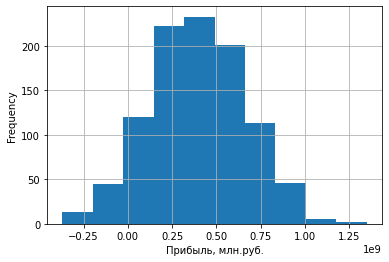

In [ ]:
bootstrap(target_0, predicted_0)

### Регион 1

Средняя выручка, млн.руб.: 461155817.2772397
Доверительный интервал, минимум: 78050810.7517417
Доверительный интервал, максимум: 862952060.2637234
Риски убытка: 0.007


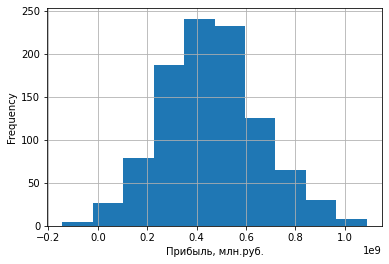

In [ ]:
bootstrap(target_1, predicted_1)

### Регион 2

Средняя выручка, млн.руб.: 392950475.17060447
Доверительный интервал, минимум: -112227625.37857565
Доверительный интервал, максимум: 934562914.5511636
Риски убытка: 0.065


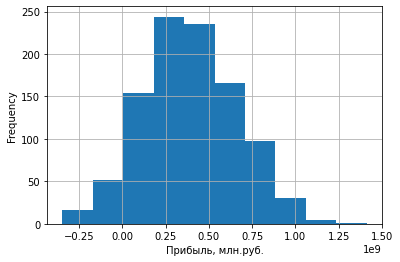

In [ ]:
bootstrap(target_2, predicted_2)

Итак, после применения метода bootstrap можно сделать следующие выводы:
* Наибольшая средняя выручка оказалась в регионе 1 (459014152.62222886 млн.руб.). 
* Доверительный интервал региона 1 полностью лежит в положительном диапозоне, а значит и вероятная прибыль также находится в нем, в регионах 0 и 2 нижняя граница доверительного интервала отрицательная, то есть и доход также может оказаться убыточным.
* Риски убытков в регионе 1 также ниже всех остальных.

**На основании проведенного анализа наилучший регион для разработки месторождения - регион 1**